# Reading TIFF files

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(r'C:\Users\sergi\Documents\repos\geopy\geopy')

import reader
import image
import plot

In [2]:
import warnings

warnings.filterwarnings("ignore")

Helpers

In [3]:
filename = r"D:\UAVs\data\rasters\downsample\20230426_nan_average_downsampling_x5_y5.tif"

def load_image() -> image.Image:
    return reader.open(filename)

def plot_band(img : image.Image, band_name) -> None:
    fig, ax = plot.get_geofigure(img, 1, 1)
    ax, mappable = plot.plot_band(img, band_name, ax = ax)
    ax = plot.add_gridlines(ax)
    fig.colorbar(mappable, label = band_name)

In [4]:
raster : image.Image = load_image()
raster

Bands: ['Band 1', 'Band 2', 'Band 3', 'Band 4', 'Band 5'] | Height: 2053 | Width: 2327

## Access properties

In [5]:
raster.width

2327

In [6]:
raster.height

2053

In [7]:
raster.band_names

['Band 1', 'Band 2', 'Band 3', 'Band 4', 'Band 5']

In [8]:
raster.transform

Affine(0.32872197253163904, 0.0, 698703.4252761274,
       0.0, -0.328673024661839, 4824831.333105283)

In [9]:
raster.crs

<Bound CRS: +proj=utm +zone=29 +ellps=GRS80 +towgs84=0,0,0,0,0 ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS 1980 ellipsoid using towgs84=0,0,0,0,0,0,0
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

## Raster operations

### Resample

In [10]:
raster.resample(scale = 2, downscale = True)
raster.transform

Affine(0.6574439450632781, 0.0, 698703.4252761274,
       0.0, -0.657346049323678, 4824831.333105283)

### Change de CRS

In [11]:
import cartopy
import cartopy.crs

raster.reproject(cartopy.crs.Mercator())
raster.transform

Affine(0.9046506361337379, 0.0, -728073.9811391523,
       0.0, -0.9046506360173225, 5366612.11440219)

### Mask using geometries

In [12]:
import geopandas as gpd

raster : image.Image = load_image()
shapes = gpd.read_file(r"D:\UAVs\data\shapefiles\sand_area\sand_area.shp").to_crs(raster.crs).geometry
shapes

0    POLYGON ((699195.761 4824519.942, 699175.557 4...
1    POLYGON ((699121.654 4824576.045, 699125.855 4...
Name: geometry, dtype: geometry

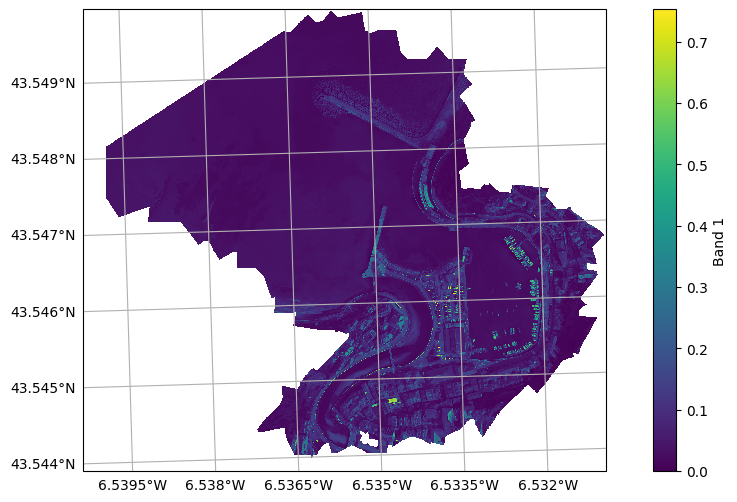

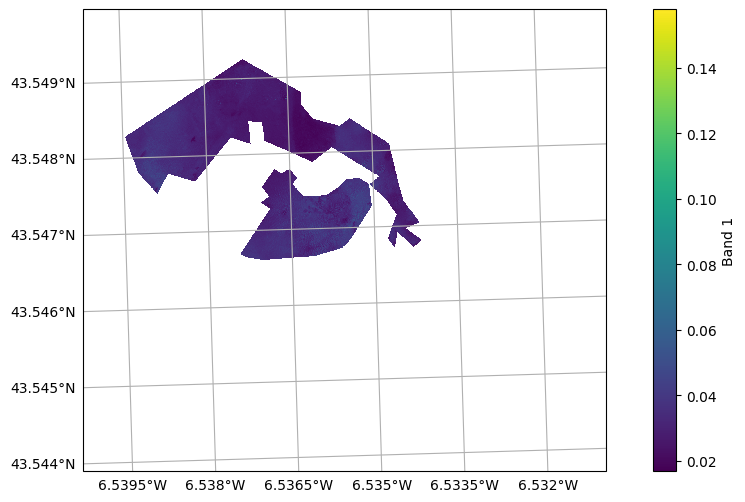

In [13]:
plot_band(raster, "Band 1")

raster.geometry_mask(shapes)

plot_band(raster, "Band 1")

### Delete empty rows & cols

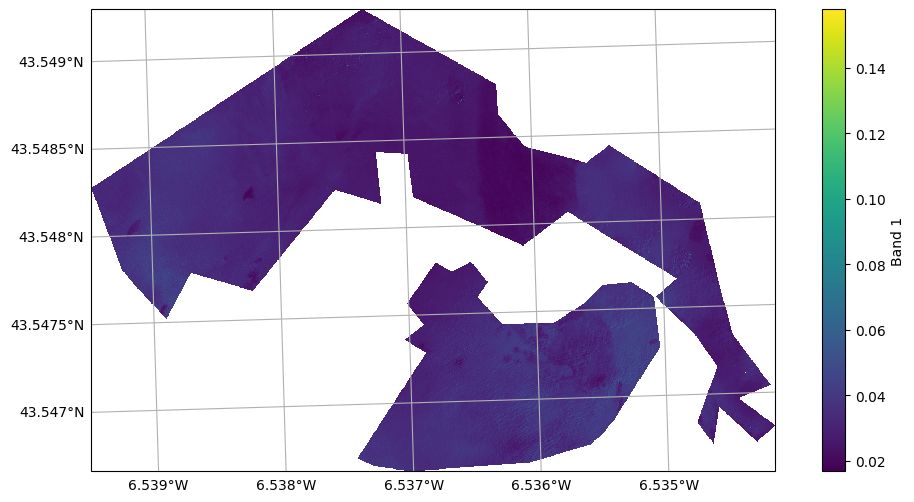

In [14]:
raster.dropna()

plot_band(raster, "Band 1")

### Clip by geometry

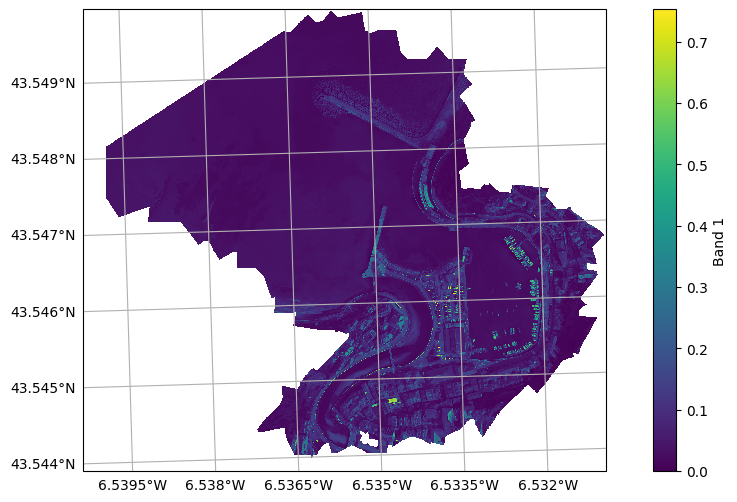

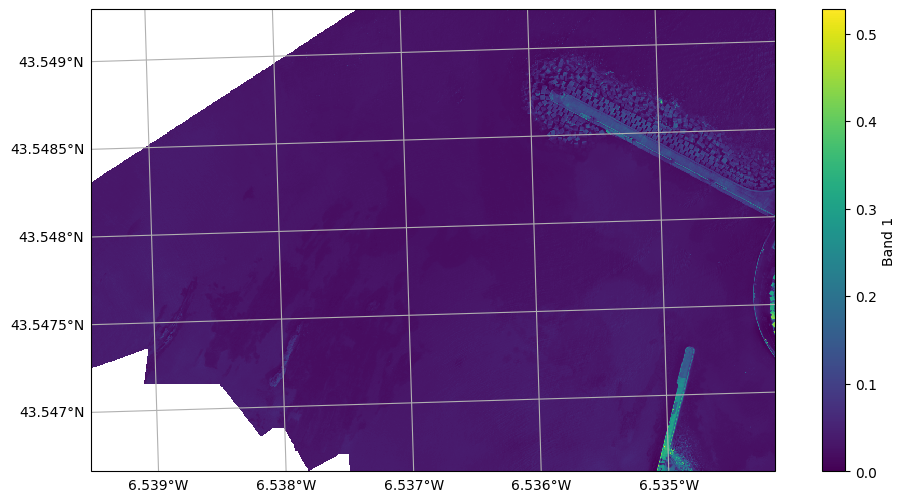

In [15]:
raster : image.Image = load_image()

plot_band(raster, "Band 1")

raster.clip(shapes)

plot_band(raster, "Band 1")

### Align 2 rasters

Load and downsample for fast processing

In [16]:
filename_1 = r"D:\UAVs\data\rasters\downsample\20230426_nan_average_downsampling_x5_y5.tif"
filename_2 = r"D:\UAVs\data\rasters\downsample\20230525_nan_average_downsampling_x5_y5.tif"

raster_1 : image.Image = reader.open(filename_1)
raster_2 : image.Image = reader.open(filename_2)

raster_1.resample(scale = 2, downscale = True)
raster_2.resample(scale = 2, downscale = True)

print(raster_1.transform)
print()
print(raster_2.transform)

| 0.66, 0.00, 698703.43|
| 0.00,-0.66, 4824831.33|
| 0.00, 0.00, 1.00|

| 0.79, 0.00, 698650.38|
| 0.00,-0.79, 4824866.10|
| 0.00, 0.00, 1.00|


Show Band 1 prior to alignment

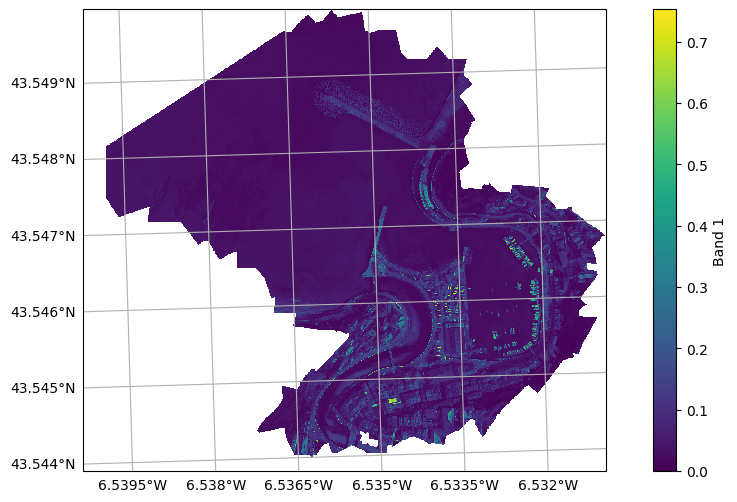

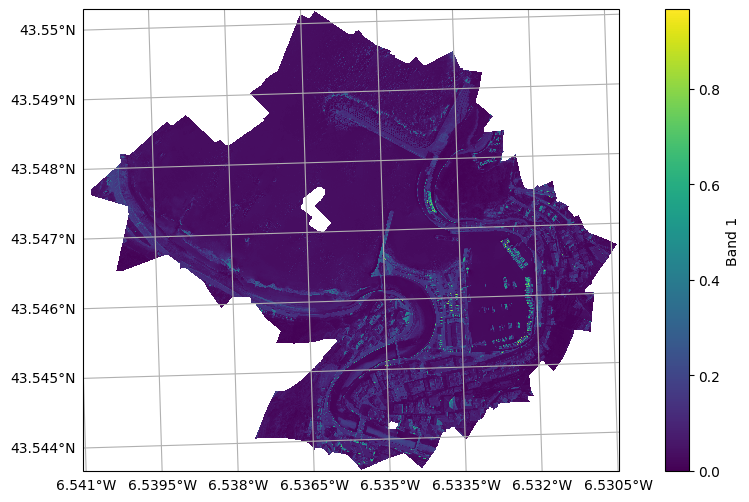

In [17]:
plot_band(raster_1, "Band 1")
plot_band(raster_2, "Band 1")

Alignment

| 0.79, 0.00, 698650.38|
| 0.00,-0.79, 4824866.10|
| 0.00, 0.00, 1.00|

| 0.79, 0.00, 698650.38|
| 0.00,-0.79, 4824866.10|
| 0.00, 0.00, 1.00|


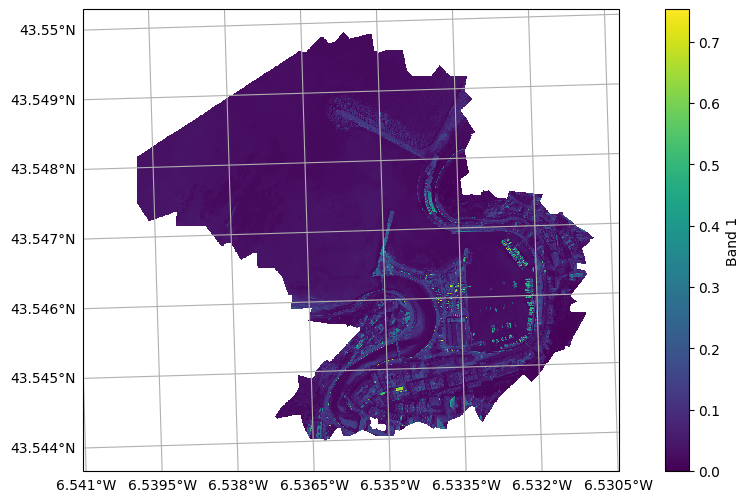

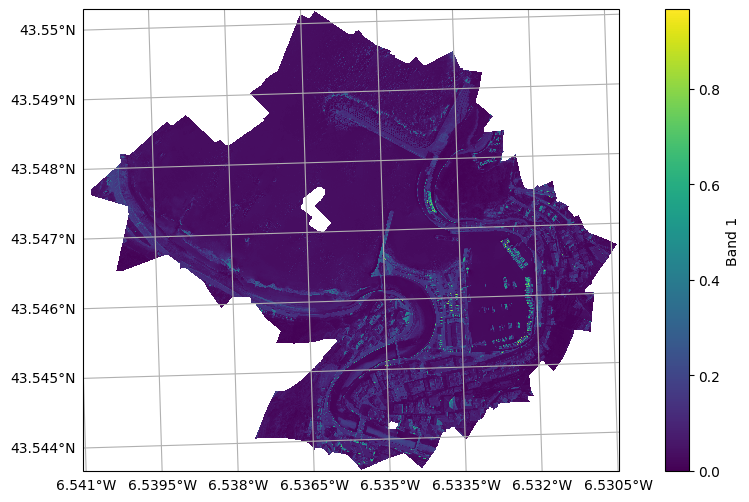

In [18]:
raster_1.align(raster_2)

print(raster_1.transform)
print()
print(raster_2.transform)

plot_band(raster_1, "Band 1")
plot_band(raster_2, "Band 1")

## Plots

### Single Band

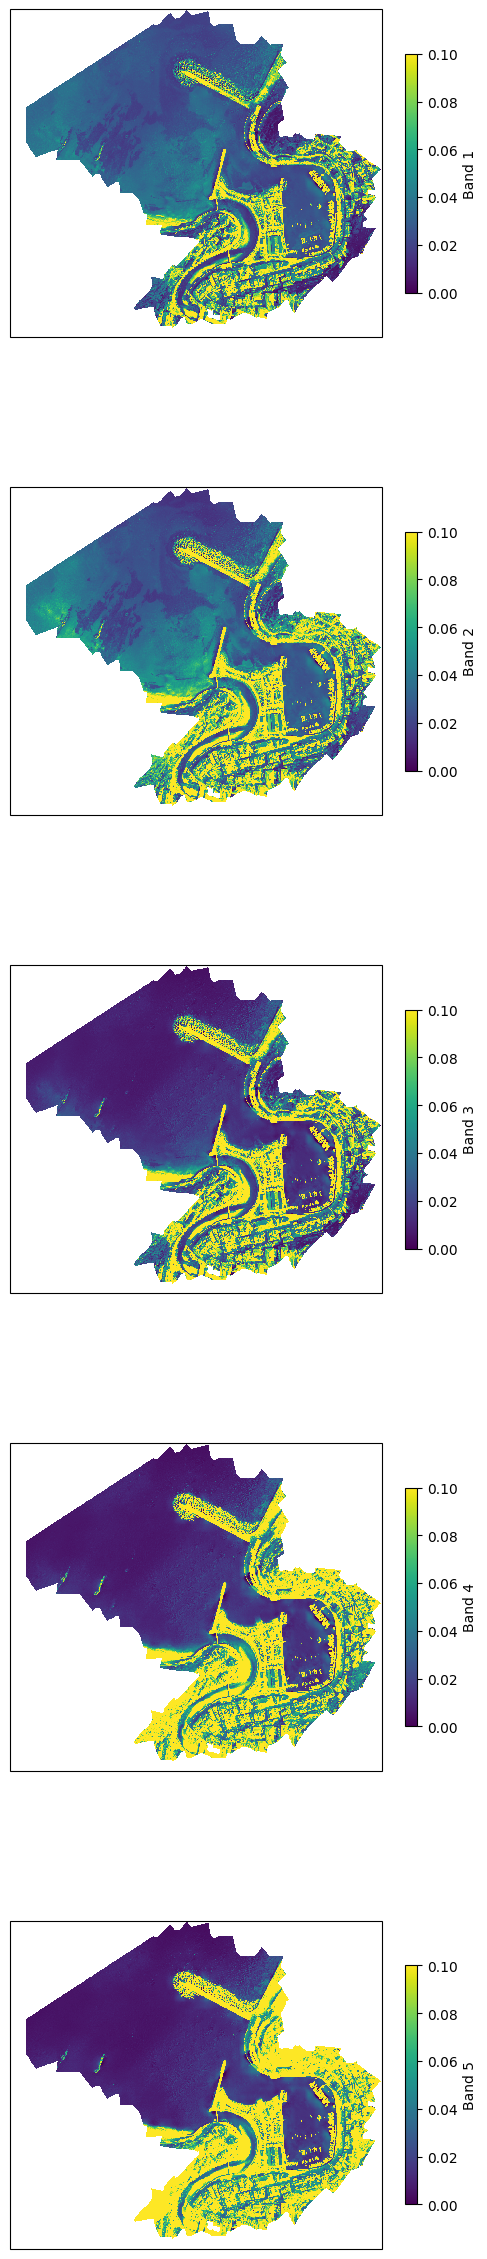

In [19]:
raster : image.Image = load_image()
raster.resample(scale = 2, downscale = True)

fig, axs = plot.get_geofigure(raster, len(raster.band_names), 1, figsize = (6, 6 * len(raster.band_names)))

for ax, band_name in zip(axs, raster.band_names):
    ax, mappable = plot.plot_band(raster, band_name, ax = ax, vmax = 0.1)
    fig.colorbar(mappable, label = band_name, shrink = 0.6)

### RGB (True color)

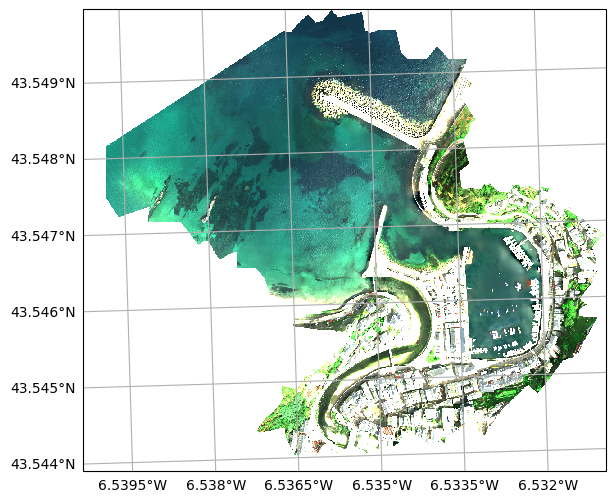

In [20]:
fig, ax = plot.get_geofigure(raster, 1, 1)
ax = plot.plot_rgb(raster, 'Band 3', 'Band 2', 'Band 1', ax = ax, brightness = 15)
ax = plot.add_gridlines(ax)

### False composite

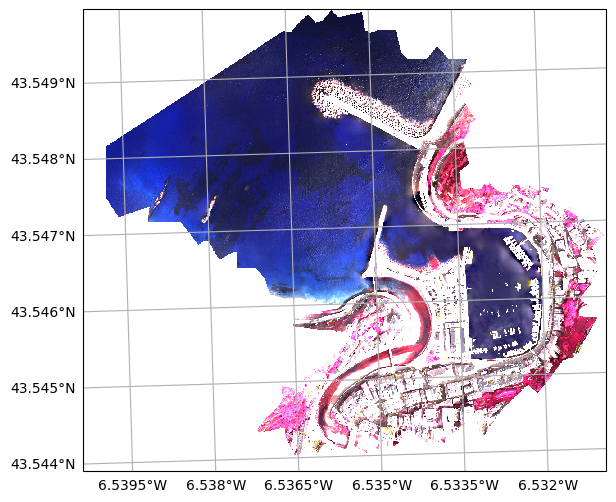

In [21]:
fig, ax = plot.get_geofigure(raster, 1, 1)
ax = plot.plot_rgb(raster, 'Band 4', 'Band 3', 'Band 2', ax = ax, brightness = 15)
ax = plot.add_gridlines(ax)

### RGB of aligned rasters

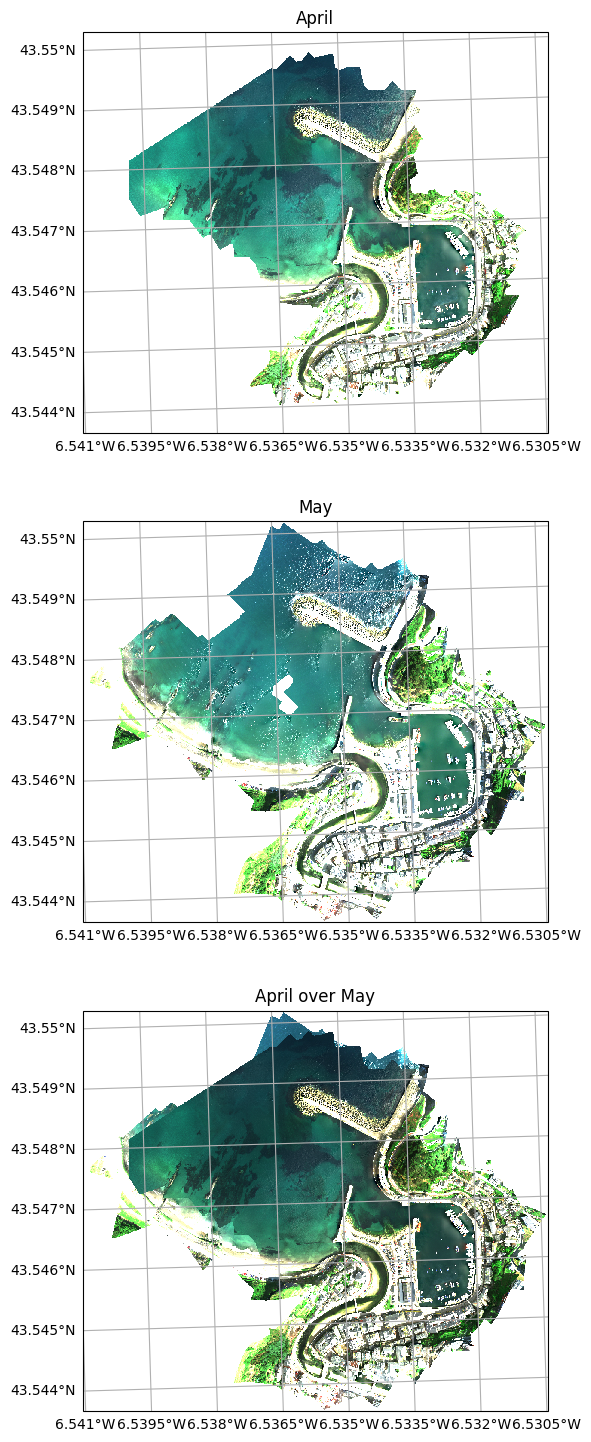

In [22]:
fig, axs = plot.get_geofigure(raster_1, 3, 1, (6, 6 * 3))

axs[0] = plot.plot_rgb(raster_1, 'Band 3', 'Band 2', 'Band 1', ax = axs[0], brightness = 15)
axs[1] = plot.plot_rgb(raster_2, 'Band 3', 'Band 2', 'Band 1', ax = axs[1], brightness = 15)

axs[2] = plot.plot_rgb(raster_2, 'Band 3', 'Band 2', 'Band 1', ax = axs[2], brightness = 15)
axs[2] = plot.plot_rgb(raster_1, 'Band 3', 'Band 2', 'Band 1', ax = axs[2], brightness = 10)

axs[0].set_title('April')
axs[1].set_title('May')
axs[2].set_title('April over May')

axs[0] = plot.add_gridlines(axs[0])
axs[1] = plot.add_gridlines(axs[1])
axs[2] = plot.add_gridlines(axs[2])

plt.subplots_adjust(wspace = 0.3)